In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 한글폰트를 설정해 주지 않으면 그래프 상에서 한글이 깨져보입니다.
# 한글이 출력될 수 있도록 폰트 설정을 해줍니다.
plt.rc('font', family='AppleGothic')

# 윈도우, 맥 외의 OS는 별도로 설정해 주세요.
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc('axes', unicode_minus=False)

In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [4]:
df = pd.read_csv('C:/Users/seung/Desktop/2020년도/NanoD/github/Learning_Spoons_Third_Project/data/City Hotel.csv')

df.shape

(78940, 31)

In [5]:
# 컬럼이 모두 보이도록 설정합니다.

pd.options.display.max_columns = 100

In [6]:
df['reserved_room_type'].unique()

array(['A', 'B', 'D', 'F', 'E', 'G', 'C'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78940 entries, 0 to 78939
Data columns (total 31 columns):
hotel                             78940 non-null object
is_canceled                       78940 non-null int64
lead_time                         78940 non-null int64
arrival_date_year                 78940 non-null int64
arrival_date_month                78940 non-null object
arrival_date_week_number          78940 non-null int64
arrival_date_day_of_month         78940 non-null int64
stays_in_weekend_nights           78940 non-null int64
stays_in_week_nights              78940 non-null int64
adults                            78940 non-null int64
children                          78940 non-null float64
babies                            78940 non-null int64
meal                              78940 non-null object
country                           78940 non-null object
market_segment                    78940 non-null object
distribution_channel              78940 non-null object
is_

In [8]:
df.isnull().sum().sort_values(ascending=False).head(15)

reservation_status_date      0
market_segment               0
is_canceled                  0
lead_time                    0
arrival_date_year            0
arrival_date_month           0
arrival_date_week_number     0
arrival_date_day_of_month    0
stays_in_weekend_nights      0
stays_in_week_nights         0
adults                       0
children                     0
babies                       0
meal                         0
country                      0
dtype: int64

In [9]:
# 'country' 값의 결측치를 "None" 으로 채웁니다.
df['country'] = df['country'].fillna("None")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,City Hotel,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,76.50,0,1,Canceled,2015-07-01
2,City Hotel,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,68.00,0,1,Canceled,2015-04-30
3,City Hotel,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,76.50,0,2,Canceled,2015-06-23
4,City Hotel,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78935,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
78936,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
78937,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
78938,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [10]:
# 'agent'의 결측치를 0으로 대체
df['agent'] = df['agent'].fillna(0)

In [11]:
# 'children'의 결측치 4개를 0으로 대체
df['children'] = df['children'].fillna(0)

In [12]:
## 제호님과 동일한 코드로 하려다가 포기
# 'arrival_date_month'의 데이터 타입을 숫자로 변경한 컬럼 추가
#import calendar
#room_type = {v:k for k,v in enumerate(room.type_abbr)}
#del room_type['']
 
#def room_type_number(data):
#    for keys,values in room_type.items():
 #       data.loc[data['reserved_room_type'].str.contains(keys),'reserved_room_type_num'] = values
  #  df['reserved_room_type_num'] = df['reserved_room_type_num'].astype('int')
   # return df[['reserved_room_type_num','reserved_room_type_num']]

In [13]:
#동일하게 변경 // 문자-> 숫자 변경 (assigned_room_type)
from sklearn.preprocessing import LabelEncoder
 
# encode class values as integers
Z = df['assigned_room_type']
assigned_room_type = LabelEncoder()
assigned_room_type.fit(Z)
assigned_room_type_Z = assigned_room_type.transform(Z)

assigned_room_type_Z.shape

(78940,)

In [14]:
#동일하게 변경 // 문자-> 숫자 변경 (assigned_room_type)
from sklearn.preprocessing import LabelEncoder

Y = df['reserved_room_type']
reserved_room_type = LabelEncoder()
reserved_room_type.fit(Z)
reserved_room_type_Y = reserved_room_type.transform(Z)

reserved_room_type_Y.shape

(78940,)

In [15]:
df.drop(['reserved_room_type','assigned_room_type'],axis=1,inplace = True)

In [16]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'agent', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [17]:
## 삭제했던 칼럼(reserved_room_type(문자)-> reserved_room_type(숫자) 삽입.)

df['reserved_room_type'] = reserved_room_type_Y

df.head

<bound method NDFrame.head of             hotel  is_canceled  lead_time  arrival_date_year  \
0      City Hotel            0          6               2015   
1      City Hotel            1         88               2015   
2      City Hotel            1         65               2015   
3      City Hotel            1         92               2015   
4      City Hotel            1        100               2015   
...           ...          ...        ...                ...   
78935  City Hotel            0         23               2017   
78936  City Hotel            0        102               2017   
78937  City Hotel            0         34               2017   
78938  City Hotel            0        109               2017   
78939  City Hotel            0        205               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   July                        27                          1   
1                   July               

In [18]:
## 삭제했던 칼럼(assigned_room_type(문자)-> assigned_room_type(숫자) 삽입.)

df['assigned_room_type'] = assigned_room_type_Z

df.head

<bound method NDFrame.head of             hotel  is_canceled  lead_time  arrival_date_year  \
0      City Hotel            0          6               2015   
1      City Hotel            1         88               2015   
2      City Hotel            1         65               2015   
3      City Hotel            1         92               2015   
4      City Hotel            1        100               2015   
...           ...          ...        ...                ...   
78935  City Hotel            0         23               2017   
78936  City Hotel            0        102               2017   
78937  City Hotel            0         34               2017   
78938  City Hotel            0        109               2017   
78939  City Hotel            0        205               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   July                        27                          1   
1                   July               

In [19]:
# df['company'] = df['company'].dropna(axis=1)
# df['agent'] = df['agent'].fillna(0)
# df['children'] = df['children'].fillna(0)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reserved_room_type,assigned_room_type
0,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,6.0,0,Transient,0.00,0,0,Check-Out,2015-07-03,0,0
1,City Hotel,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Transient,76.50,0,1,Canceled,2015-07-01,0,0
2,City Hotel,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Transient,68.00,0,1,Canceled,2015-04-30,0,0
3,City Hotel,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Transient,76.50,0,2,Canceled,2015-06-23,0,0
4,City Hotel,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Transient,76.50,0,1,Canceled,2015-04-02,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78935,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,0,0
78936,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,4,4
78937,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,3,3
78938,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,0,0


In [20]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'agent', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'reserved_room_type',
       'assigned_room_type'],
      dtype='object')

In [21]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reserved_room_type,assigned_room_type
is_canceled,1.000000,0.309010,-0.003377,0.001780,-0.003998,-0.006505,0.050696,0.049602,-0.027327,-0.030340,-0.063612,0.166809,-0.053219,-0.150438,0.011956,0.060978,-0.014862,-0.133340,-0.294911,-0.163563,-0.163563
lead_time,0.309010,1.000000,0.027147,0.130879,0.014208,-0.024241,0.059010,0.116395,-0.058143,-0.030142,-0.105665,0.122711,-0.065554,-0.029008,0.034444,0.187268,-0.141767,-0.077635,-0.133815,-0.191497,-0.191497
arrival_date_year,-0.003377,0.027147,1.000000,-0.543074,-0.002578,0.035391,0.067617,0.071239,0.057235,-0.007884,-0.029318,-0.195593,0.021338,0.033543,0.131987,-0.068771,0.250812,-0.001409,0.135506,0.062997,0.062997
arrival_date_week_number,0.001780,0.130879,-0.543074,1.000000,0.060822,-0.000459,-0.008056,0.007454,-0.000990,0.004997,0.001642,0.036964,-0.012295,0.003398,-0.049348,0.017651,0.017351,-0.003424,0.015404,-0.000924,-0.000924
arrival_date_day_of_month,-0.003998,0.014208,-0.002578,0.060822,1.000000,0.000636,-0.011852,-0.000821,0.011344,0.000560,-0.012659,-0.010935,-0.001854,0.015518,0.008235,0.023200,0.024002,0.003777,-0.002280,0.011605,0.011605
stays_in_weekend_nights,-0.006505,-0.024241,0.035391,-0.000459,0.000636,1.000000,0.201886,0.092626,0.036651,0.006891,-0.078652,-0.038729,-0.027656,0.019905,-0.028837,-0.056483,0.040511,-0.024438,0.069048,0.049512,0.049512
stays_in_week_nights,0.050696,0.059010,0.067617,-0.008056,-0.011852,0.201886,1.000000,0.101604,0.035616,0.005569,-0.090731,-0.051063,-0.041309,0.042665,-0.015717,0.016531,0.062109,-0.038675,0.065024,0.059858,0.059858
adults,0.049602,0.116395,0.071239,0.007454,-0.000821,0.092626,0.101604,1.000000,0.049323,0.013215,-0.161421,-0.041946,-0.113617,-0.069439,-0.094260,-0.010492,0.250598,0.011139,0.167819,0.235649,0.235649
children,-0.027327,-0.058143,0.057235,-0.000990,0.011344,0.036651,0.035616,0.049323,1.000000,0.023286,-0.027410,-0.043048,-0.016851,0.046828,-0.053628,-0.035649,0.334962,0.058937,0.108057,0.376007,0.376007
babies,-0.030340,-0.030142,-0.007884,0.004997,0.000560,0.006891,0.005569,0.013215,0.023286,1.000000,-0.001671,-0.008709,-0.003242,0.068869,-0.002886,-0.009048,0.013614,0.019889,0.072382,0.037751,0.037751


In [22]:
from scipy import stats
df_0 = df.loc[df['is_canceled']==0,['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes']].copy()
df_1 = df.loc[df['is_canceled']==1,['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes']].copy()

In [23]:
def t_test(x,y):
    lresult=stats.levene(x,y)
    print('LeveneResult(F):{:.3f}\np-value:{:.3f}'.format(lresult.statistic,lresult.pvalue))
    if round(lresult.pvalue,2) < 0.05:
        result = stats.ttest_ind(x,y,equal_var=False)
    else:
        result = stats.ttest_ind(x,y,equal_var=True)
    print('t-testResult(F):{:.3f}\np-value:{:.3f}'.format(result.statistic,result.pvalue))

In [24]:
col_lst = ['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes']

In [25]:
for i in col_lst:
    print(i)
    t_test(df_0[i],df_1[i])

is_repeated_guest
LeveneResult(F):320.717
p-value:0.000
t-testResult(F):19.196
p-value:0.000
previous_cancellations
LeveneResult(F):2259.346
p-value:0.000
t-testResult(F):-44.777
p-value:0.000
previous_bookings_not_canceled
LeveneResult(F):224.205
p-value:0.000
t-testResult(F):17.035
p-value:0.000
reserved_room_type
LeveneResult(F):2169.865
p-value:0.000
t-testResult(F):48.309
p-value:0.000
assigned_room_type
LeveneResult(F):2169.865
p-value:0.000
t-testResult(F):48.309
p-value:0.000
booking_changes
LeveneResult(F):1827.870
p-value:0.000
t-testResult(F):46.213
p-value:0.000


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


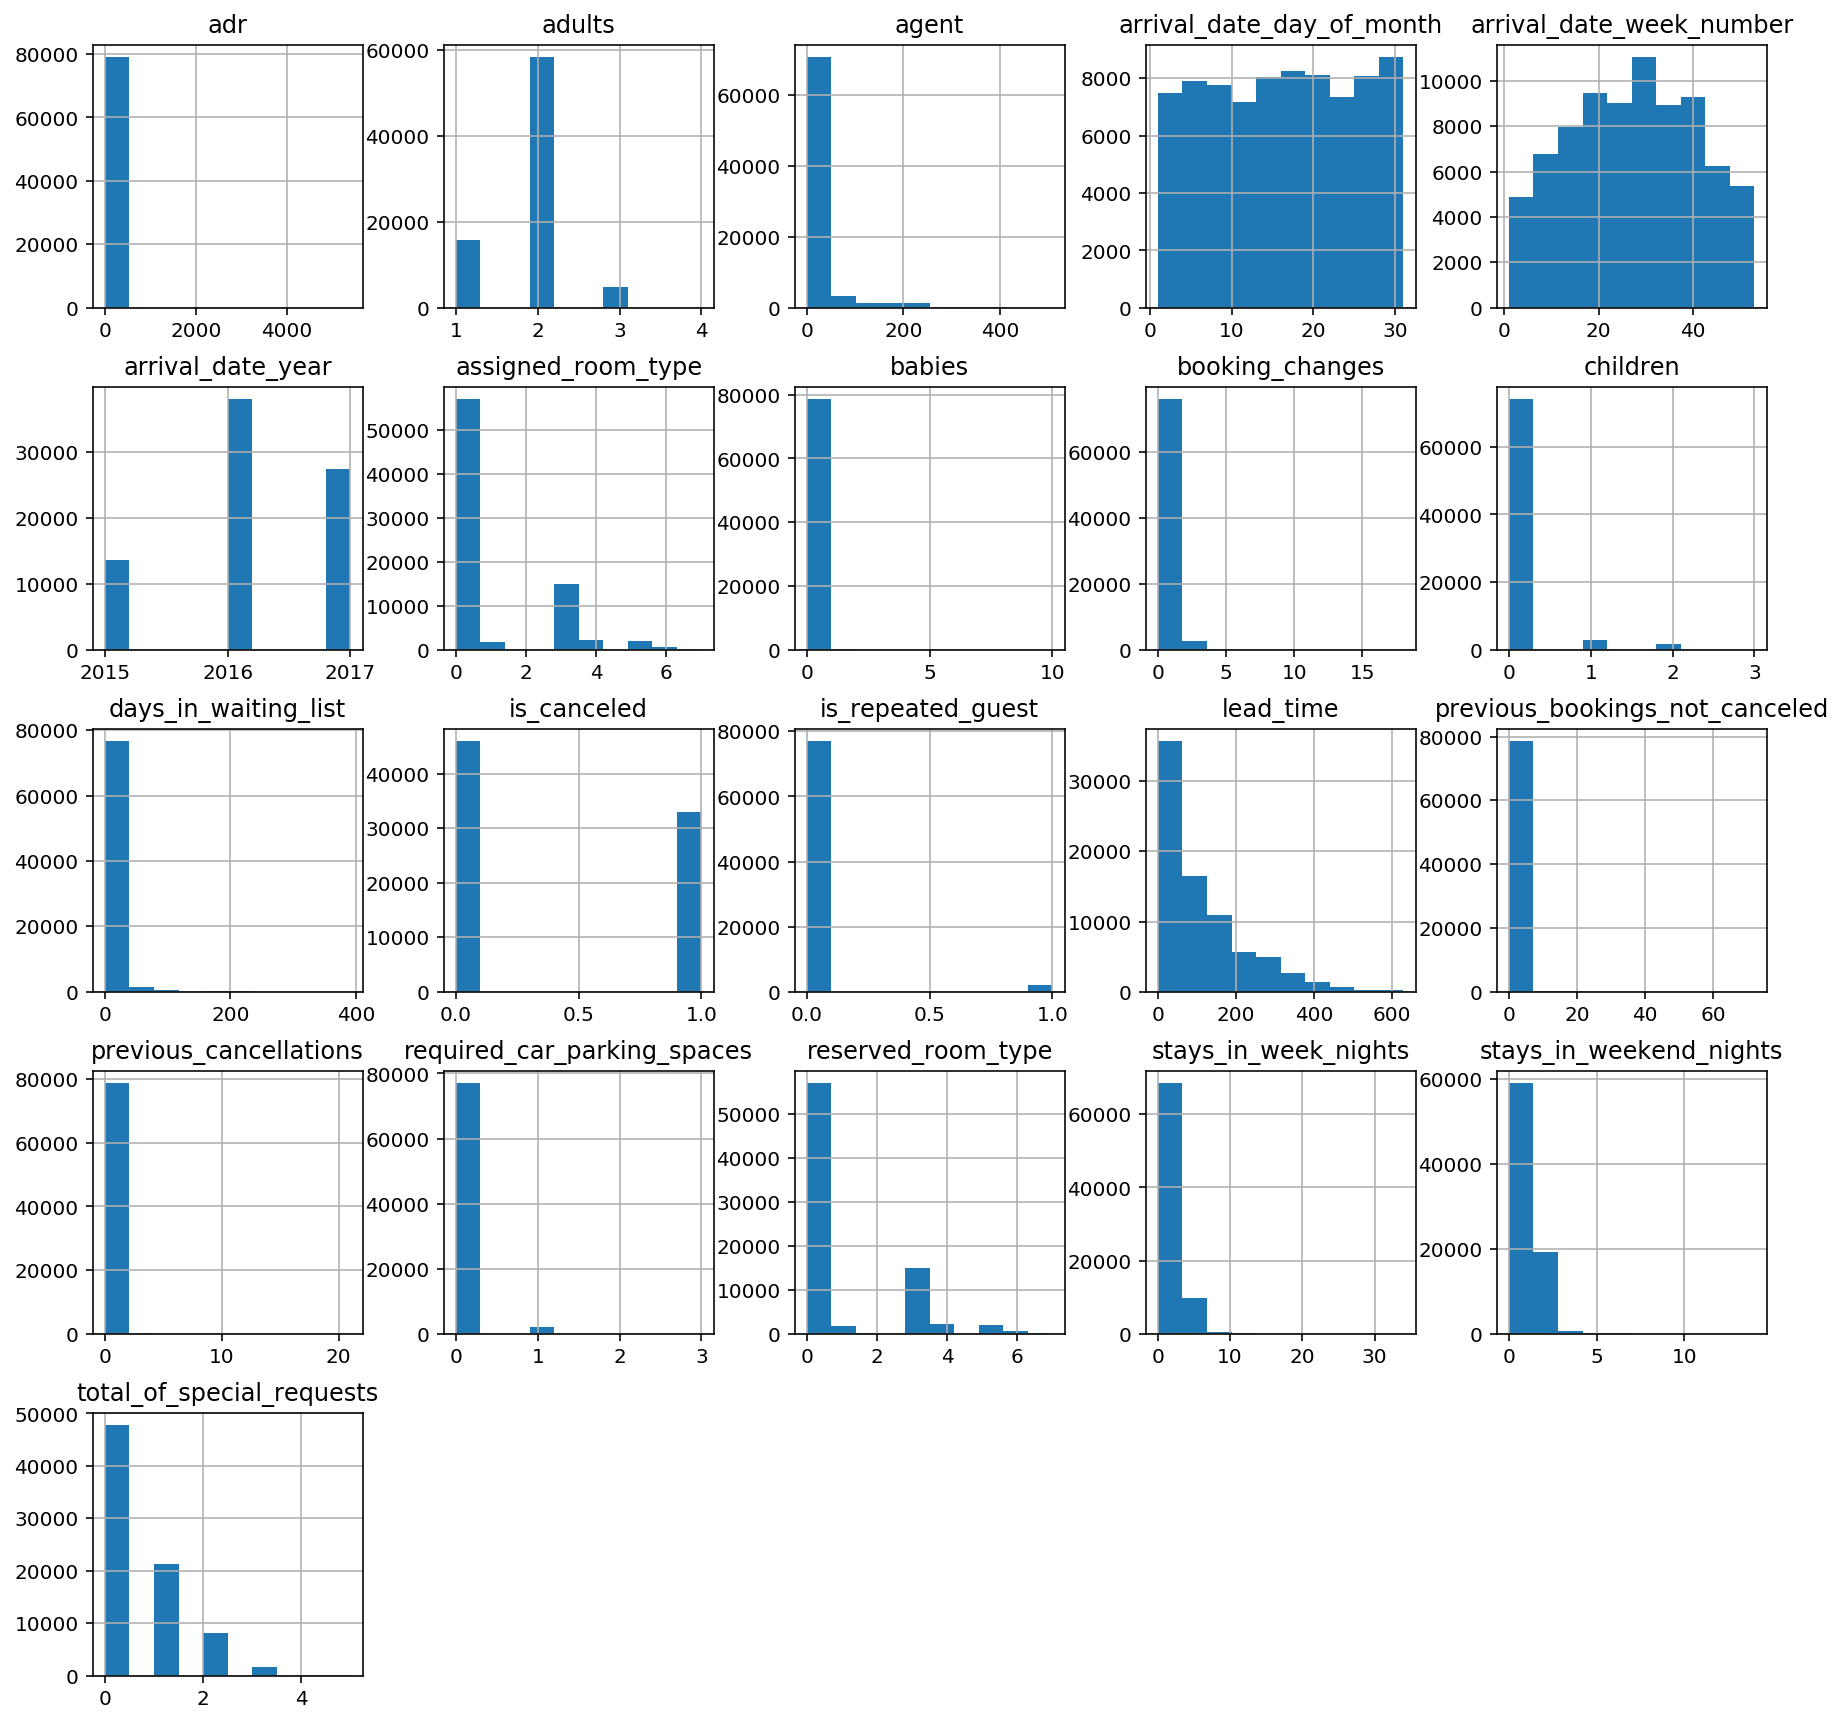

In [26]:
h = df.hist(figsize=(15, 15))

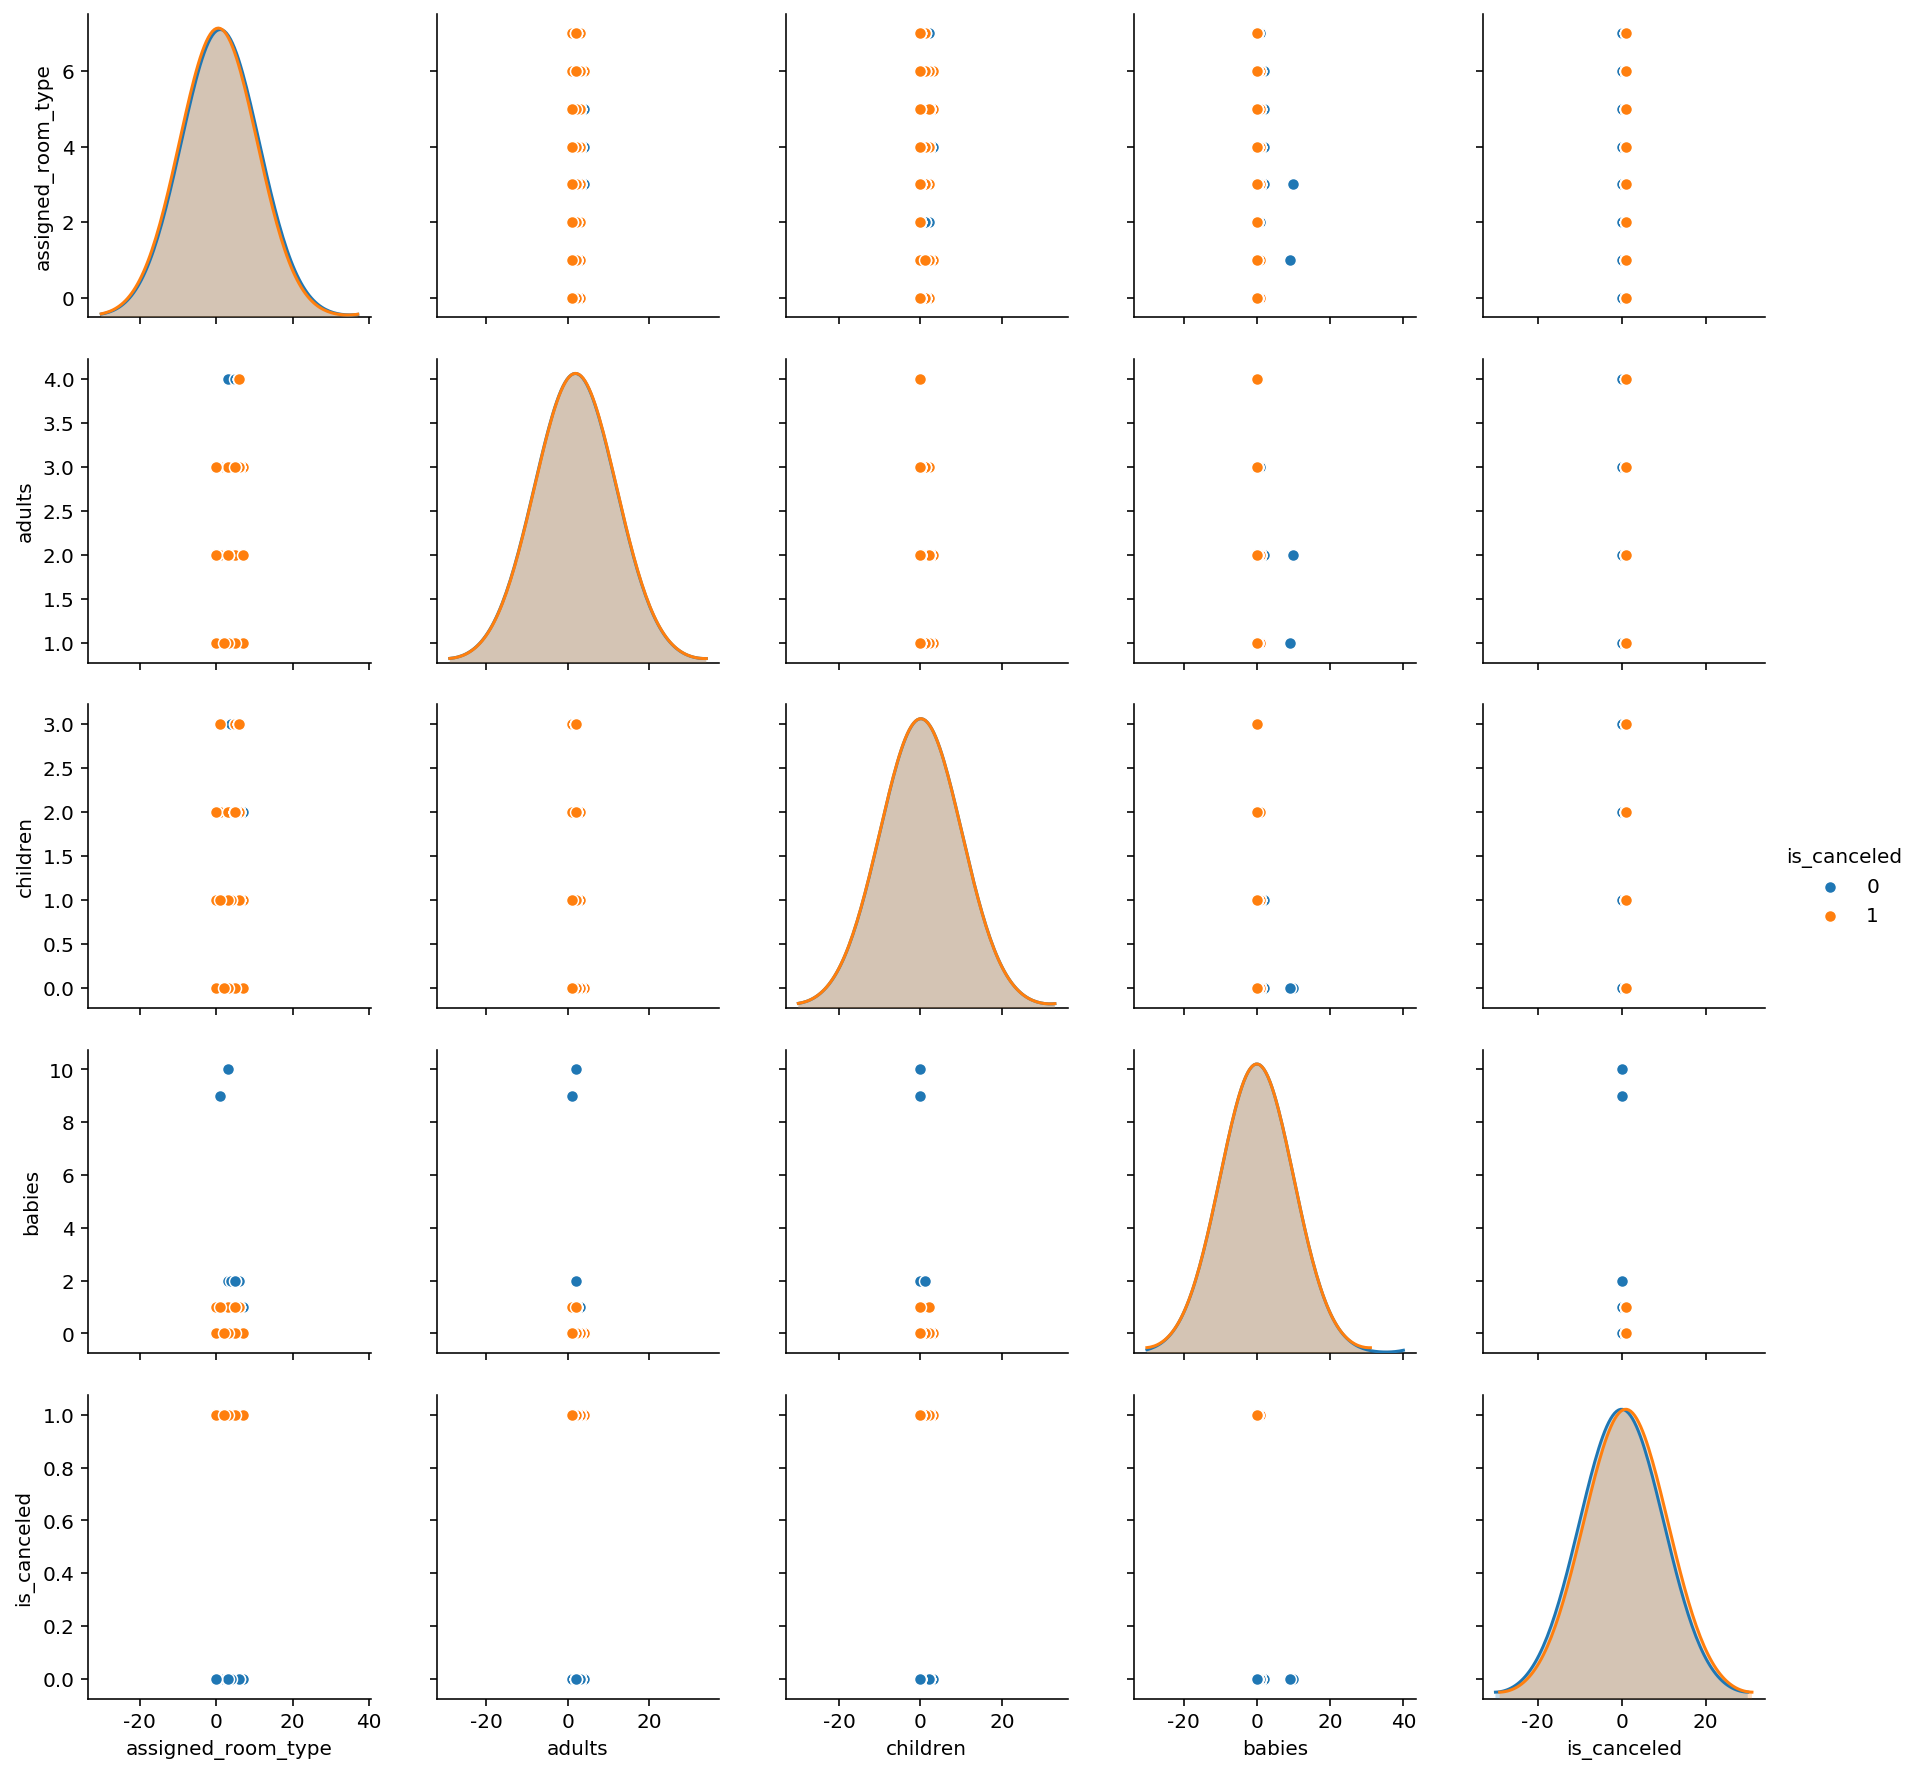

In [27]:
sns.pairplot(df[[ 'assigned_room_type', 'adults', 'children', 'babies','is_canceled']], 
             hue = 'is_canceled', diag_kws={'bw':10})

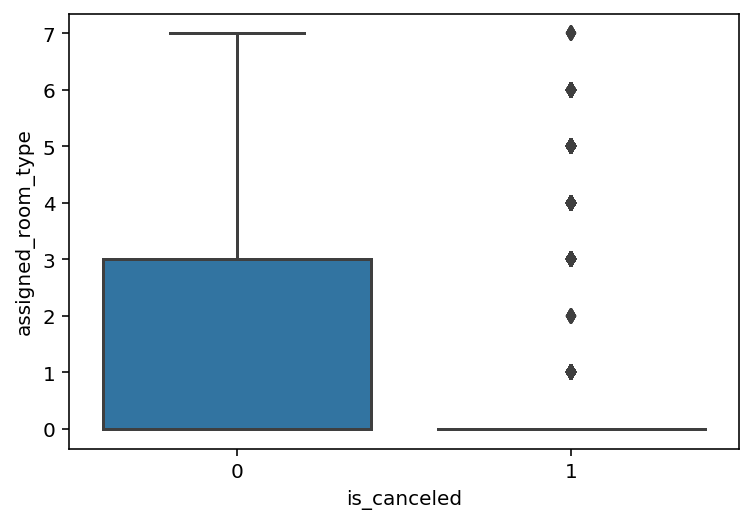

In [28]:
sns.boxplot(data=df, x='is_canceled', y='assigned_room_type')

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
# 한글폰트를 설정해 주지 않으면 그래프 상에서 한글이 깨져보입니다.
# 한글이 출력될 수 있도록 폰트 설정을 해줍니다.
plt.rc('font', family='AppleGothic')

# 윈도우, 맥 외의 OS는 별도로 설정해 주세요.
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc('axes', unicode_minus=False)

# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [31]:
df1 = pd.read_csv('C:/Users/seung/Desktop/2020년도/NanoD/github/Learning_Spoons_Third_Project/data/Resort Hotel.csv')

df1.shape

(40047, 31)

In [32]:
# 컬럼이 모두 보이도록 설정합니다.

pd.options.display.max_columns = 100

df1['reserved_room_type'].unique()


array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40047 entries, 0 to 40046
Data columns (total 31 columns):
hotel                             40047 non-null object
is_canceled                       40047 non-null int64
lead_time                         40047 non-null int64
arrival_date_year                 40047 non-null int64
arrival_date_month                40047 non-null object
arrival_date_week_number          40047 non-null int64
arrival_date_day_of_month         40047 non-null int64
stays_in_weekend_nights           40047 non-null int64
stays_in_week_nights              40047 non-null int64
adults                            40047 non-null int64
children                          40047 non-null float64
babies                            40047 non-null int64
meal                              40047 non-null object
country                           40047 non-null object
market_segment                    40047 non-null object
distribution_channel              40047 non-null object
is_

In [34]:
df1.isnull().sum().sort_values(ascending=False).head(15)

reservation_status_date      0
market_segment               0
is_canceled                  0
lead_time                    0
arrival_date_year            0
arrival_date_month           0
arrival_date_week_number     0
arrival_date_day_of_month    0
stays_in_weekend_nights      0
stays_in_week_nights         0
adults                       0
children                     0
babies                       0
meal                         0
country                      0
dtype: int64

In [35]:
# 'country' 값의 결측치를 "None" 으로 채웁니다.
df1['country'] = df['country'].fillna("None")
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40042,Resort Hotel,0,212,2017,August,35,31,2,8,2,1.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143.0,0,Transient,89.75,0,0,Check-Out,2017-09-10
40043,Resort Hotel,0,169,2017,August,35,30,2,9,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40044,Resort Hotel,0,204,2017,August,35,29,4,10,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0,Transient,153.57,0,3,Check-Out,2017-09-12
40045,Resort Hotel,0,211,2017,August,35,31,4,10,2,0.0,0,HB,FRA,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40.0,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [36]:
# 'agent'의 결측치를 0으로 대체
df1['agent'] = df1['agent'].fillna(0)

In [37]:
# 'children'의 결측치 4개를 0으로 대체
df1['children'] = df1['children'].fillna(0)

In [38]:
#동일하게 변경 // 문자-> 숫자 변경 (assigned_room_type)
from sklearn.preprocessing import LabelEncoder
 
# encode class values as integers
V = df1['assigned_room_type']
assigned_room_type = LabelEncoder()
assigned_room_type.fit(V)
assigned_room_type_V = assigned_room_type.transform(V)

assigned_room_type_V.shape


(40047,)

In [39]:
#동일하게 변경 // 문자-> 숫자 변경 (assigned_room_type)
from sklearn.preprocessing import LabelEncoder

W = df1['reserved_room_type']
reserved_room_type = LabelEncoder()
reserved_room_type.fit(W)
reserved_room_type_W = reserved_room_type.transform(W)

reserved_room_type_W.shape


(40047,)

In [40]:
df1.drop(['reserved_room_type','assigned_room_type'],axis=1,inplace = True)

df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'agent', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [41]:
## 삭제했던 칼럼(assigned_room_type(문자)-> assigned_room_type(숫자) 삽입.)

df1['assigned_room_type'] = assigned_room_type_Z

df1.head

ValueError: Length of values does not match length of index

In [ ]:
df1

In [ ]:
df1.columns

In [ ]:
df1.corr()

In [ ]:
from scipy import stats
df_0 = df1.loc[df['is_canceled']==0,['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes']].copy()
df_1 = df1.loc[df['is_canceled']==1,['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes']].copy()


In [ ]:
def t_test(x,y):
    lresult=stats.levene(x,y)
    print('LeveneResult(F):{:.3f}\np-value:{:.3f}'.format(lresult.statistic,lresult.pvalue))
    if round(lresult.pvalue,2) < 0.05:
        result = stats.ttest_ind(x,y,equal_var=False)
    else:
        result = stats.ttest_ind(x,y,equal_var=True)
    print('t-testResult(F):{:.3f}\np-value:{:.3f}'.format(result.statistic,result.pvalue))


In [ ]:
col_lst = ['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes']


In [ ]:
for i in col_lst:
    print(i)
    t_test(df_0[i],df_1[i])

In [ ]:
h = df1.hist(figsize=(15, 15))

In [ ]:
sns.pairplot(df1[[ 'assigned_room_type', 'adults', 'children', 'babies','is_canceled']], 
             hue = 'is_canceled', diag_kws={'bw':10})

In [ ]:
sns.boxplot(data=df1, x='is_canceled', y='assigned_room_type')